# Job Postings Analysis(EDA): What Do Companies Want for Data Analyst Roles in 2024?

## **1. Introduction** (done)

**Objective:**  
The goal of this project is to analyze job postings to determine what companies are looking for in data analyst roles in 2024. This analysis aims to create a data-driven roadmap for an ideal portfolio for aspiring data analysts.

**Data Source:**  
- Original Dataset: [LinkedIn Job Postings](https://www.kaggle.com/datasets/arshkon/linkedin-job-postings/data)  
- The dataset contains 123,894 observations and was web-scraped between **December 5, 2023, and April 20, 2024**. Most posts were scraped within a 5-day window, suggesting they were collected around the same time.

In [64]:
# Check GPU availability (Optional) For me
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if 'failed' in gpu_info:
    print('Not connected to a GPU')
else:
    print(gpu_info)

Fri Sep 27 19:43:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              51W / 400W |   1243MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

In [3]:
# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**2.Data Collection and Storage** (done)


You need to get api key for this to work

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d kaggleprofile/dataset

In [ ]:
#Download dircetly from kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Data'

In [63]:
!kaggle datasets download -d arshkon/linkedin-job-postings

Dataset URL: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings
License(s): CC-BY-SA-4.0
 83% 131M/159M [00:00<00:00, 183MB/s]
100% 159M/159M [00:00<00:00, 193MB/s]


In [4]:
import pandas as pd
import glob
import os

def file_upload(folder_name, data_frames=None):
    if data_frames is None:
        data_frames = {}

    # Search for all CSV and XLSX files in the folder and subfolders
    file_paths = glob.glob(os.path.join(folder_name, '**/*.csv'), recursive=True) + \
                 glob.glob(os.path.join(folder_name, '**/*.xlsx'), recursive=True)

    # Loop through each file and load it into a DataFrame
    for file in file_paths:

        if file.endswith('.csv'):
            df = pd.read_csv(file)
        elif file.endswith('.xlsx'):
            df = pd.read_excel(file)

        # Get filename without the path and extension
        file_name = os.path.splitext(os.path.basename(file))[0]
        data_frames[file_name] = df

    return data_frames

# UPLOAD Job Postings Data
folder_path = '/content/drive/My Drive/Data'
data_frames = file_upload(folder_path)

In [5]:
print(data_frames.keys())
for df in data_frames.values():
    display(df.head())
df.shape

dict_keys(['postings_cleaned', 'data_related_positions_cleaned', 'postings', 'skills', 'industries', 'companies', 'employee_counts', 'company_industries', 'company_specialities', 'benefits', 'salaries', 'job_skills', 'job_industries'])


,job_id,company_name,title,description,max_salary,pay_period,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,work_type,currency,compensation_type,normalized_salary,zip_code,city,state,country
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,2774458.0,20.0,NaN,17.0,Full-time,2.0,1.713398e+12,NaN,ComplexOnsiteApply,1.715990e+12,NaN,NaN,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,FULL_TIME,USD,BASE_SALARY,38480.0,8540,Princeton,New Jersey,US
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,NaN,1.0,NaN,30.0,Full-time,NaN,1.712858e+12,NaN,ComplexOnsiteApply,1.715450e+12,NaN,NaN,NaN,1.712858e+12,FULL_TIME,USD,BASE_SALARY,83200.0,80521,Fort Collins,Colorado,US
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,64896719.0,8.0,NaN,45000.0,Full-time,NaN,1.713278e+12,NaN,ComplexOnsiteApply,1.715870e+12,NaN,NaN,We are currently accepting resumes for FOH - A...,1.713278e+12,FULL_TIME,USD,BASE_SALARY,55000.0,45202,Cincinnati,Ohio,US
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,766262.0,16.0,NaN,140000.0,Full-time,NaN,1.712896e+12,NaN,ComplexOnsiteApply,1.715488e+12,NaN,NaN,This position requires a baseline understandin...,1.712896e+12,FULL_TIME,USD,BASE_SALARY,157500.0,11040,New Hyde Park,New York,US
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,NaN,3.0,NaN,60000.0,Full-time,NaN,1.713452e+12,NaN,ComplexOnsiteApply,1.716044e+12,NaN,NaN,NaN,1.713452e+12,FULL_TIME,USD,BASE_SALARY,70000.0,52601,Burlington,Iowa,US


,job_id,company_name,title,description,max_salary,pay_period,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,application_type,expiry,formatted_experience_level,skills_desc,listed_time,work_type,currency,compensation_type,normalized_salary,zip_code,city,state,country
0,3742692445,ZenithMinds Inc,Sr Data Engineer with Kafka,"['data', 'engineer', 'kafka', 'w', 'remote', '...",NaN,NaN,81941852.0,39.0,NaN,NaN,Full-time,10.0,2024-04-15 19:17:53,1.0,ComplexOnsiteApply,2024-10-12 19:17:15,NaN,NaN,2024-04-15 19:17:53,FULL_TIME,NaN,NaN,NaN,78701,Austin,Texas,US
1,3797449314,"Subaru Research and Development, Inc",Cloud Platform/ Big Data Engineer,"['subaru', 'research', 'development', 'care', ...",NaN,NaN,91080439.0,7.0,NaN,NaN,Full-time,1.0,2024-04-19 18:57:34,NaN,ComplexOnsiteApply,2024-05-19 18:57:34,Entry level,NaN,2024-04-19 18:57:34,FULL_TIME,NaN,NaN,NaN,0,NaN,NaN,US
2,3800989742,SilverSpace Technologies Inc,Data Engineer/ETL,"['responsibility', 'develop', 'new', 'feature'...",NaN,NaN,71373471.0,39.0,NaN,NaN,Contract,12.0,2024-04-19 13:36:53,NaN,ComplexOnsiteApply,2024-05-19 13:36:53,NaN,NaN,2024-04-19 13:36:53,CONTRACT,NaN,NaN,NaN,6101,Hartford,Connecticut,US
3,3813645405,Tenazx Inc,Data Analyst,"['job', 'title', 'data', 'analystduration', 'c...",NaN,NaN,82537206.0,4.0,NaN,NaN,Contract,NaN,2024-04-18 18:34:39,NaN,ComplexOnsiteApply,2024-05-18 18:34:39,NaN,NaN,2024-04-18 18:34:39,CONTRACT,NaN,NaN,NaN,11427,Queens Village,New York,US
4,3872787865,Radiant Systems Inc,eCommerce Data Analyst,"['job', 'description', 'job', 'summary', 'resp...",NaN,NaN,3342169.0,102.0,NaN,NaN,Contract,NaN,2024-04-16 14:27:04,1.0,ComplexOnsiteApply,2024-05-16 14:27:04,NaN,NaN,2024-04-16 14:27:04,CONTRACT,NaN,NaN,NaN,0,NaN,NaN,US


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,17.0,Full-time,2.0,1.713398e+12,NaN,https://www.linkedin.com/jobs/view/921716/?trk...,NaN,ComplexOnsiteApply,1.715990e+12,NaN,NaN,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,30.0,Full-time,NaN,1.712858e+12,NaN,https://www.linkedin.com/jobs/view/1829192/?tr...,NaN,ComplexOnsiteApply,1.715450e+12,NaN,NaN,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,45000.0,Full-time,NaN,1.713278e+12,NaN,https://www.linkedin.com/jobs/view/10998357/?t...,NaN,ComplexOnsiteApply,1.715870e+12,NaN,NaN,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,140000.0,Full-time,NaN,1.712896e+12,NaN,https://www.linkedin.com/jobs/view/23221523/?t...,NaN,ComplexOnsiteApply,1.715488e+12,NaN,NaN,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,60000.0,Full-time,NaN,1.713452e+12,NaN,https://www.linkedin.com/jobs/view/35982263/?t...,NaN,ComplexOnsiteApply,1.716044e+12,NaN,NaN,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


,skill_abr,skill_name
0,ART,Art/Creative
1,DSGN,Design
2,ADVR,Advertising
3,PRDM,Product Management
4,DIST,Distribution


,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"


,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
3,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
4,1033,Accenture,Accenture is a leading global professional ser...,7.0,0,IE,Dublin 2,0,Grand Canal Harbour,https://www.linkedin.com/company/accenture


,company_id,employee_count,follower_count,time_recorded
0,391906,186,32508,1712346173
1,22292832,311,4471,1712346173
2,20300,1053,6554,1712346173
3,3570660,383,35241,1712346173
4,878353,52,26397,1712346173


,company_id,industry
0,391906,Book and Periodical Publishing
1,22292832,Construction
2,20300,Banking
3,3570660,Book and Periodical Publishing
4,878353,Staffing and Recruiting


,company_id,speciality
0,22292832,window replacement
1,22292832,patio door replacement
2,20300,Commercial Banking
3,20300,Retail Banking
4,20300,Mortgage


,job_id,inferred,type
0,3887473071,0,Medical insurance
1,3887473071,0,Vision insurance
2,3887473071,0,Dental insurance
3,3887473071,0,401(k)
4,3887473071,0,Student loan assistance


,salary_id,job_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type
0,1,3884428798,NaN,20.0,NaN,HOURLY,USD,BASE_SALARY
1,2,3887470552,25.0,NaN,23.0,HOURLY,USD,BASE_SALARY
2,3,3884431523,120000.0,NaN,100000.0,YEARLY,USD,BASE_SALARY
3,4,3884911725,200000.0,NaN,10000.0,YEARLY,USD,BASE_SALARY
4,5,3887473220,35.0,NaN,33.0,HOURLY,USD,BASE_SALARY


,job_id,skill_abr
0,3884428798,MRKT
1,3884428798,PR
2,3884428798,WRT
3,3887473071,SALE
4,3887465684,FIN


,job_id,industry_id
0,3884428798,82
1,3887473071,48
2,3887465684,41
3,3887467939,82
4,3887467939,80


(164808, 2)

## **3. Data Cleaning and Preparation**

Before analyzing the data, we need to clean and prepare it by handling missing values, duplicates, and extracting useful information.



1.   Take a look at all column names. Go through every data category making notes along the way
2.   Delete useless or missleading data/columns
3.   Handle the missing values, duplicates



In [6]:
df = data_frames['postings']

### **3.1 Initial sneak peak into columns**

**Drop Unnecessary Columns**

We identify and drop columns that are not relevant to our analysis.

In [7]:
print(f"The following data frame is {df.shape[0]} rows and {df.shape[1]} columns.\n Here are the following column names: \n{df.columns}")

The following data frame is 123849 rows and 31 columns.
 Here are the following column names: 
Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')


In [8]:
# Columns I could drop right away
columns_to_drop = [
       "job_posting_url",
    "application_url",  "posting_domain",
    "sponsored", "fips"
]

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print("Columns after dropping unnecessary ones:")
print(df.columns.tolist())
df.shape

Columns after dropping unnecessary ones:
['job_id', 'company_name', 'title', 'description', 'max_salary', 'pay_period', 'location', 'company_id', 'views', 'med_salary', 'min_salary', 'formatted_work_type', 'applies', 'original_listed_time', 'remote_allowed', 'application_type', 'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc', 'listed_time', 'work_type', 'currency', 'compensation_type', 'normalized_salary', 'zip_code']


(123849, 26)

### **Observable column categories**


1.  Time columns
2.  Salary columns
3.  Categorical data
4.  Location data
5.  Text data (description, skills_des, title)



**Remove Duplicate Rows, job_id used to be in the way of that**

In [9]:
# Remove duplicate rows
df = df.drop_duplicates(subset=[col for col in df.columns if col != 'job_id'], keep='first')
print(f"Dataset after removing duplicates: {df.shape[0]} rows.")

Dataset after removing duplicates: 123547 rows.


### 3.2 Handling location data



In [10]:
#Research on location data

LOCATION_COLUMNS = ['location', 'zip_code']
display(df[LOCATION_COLUMNS].describe())
#Need to see why some digits are 4 digits long, when zipcodes are suppoused to be American
display(df[LOCATION_COLUMNS].isnull().sum())
#Need to handle null values later.
data = df[LOCATION_COLUMNS].copy()
display(data.isnull().sum())


display(data['zip_code'].dtype)
display(data['location'].dtype)

data['zip_code'] = data['zip_code'].fillna(0)
data['zip_code'] = data['zip_code'].astype('int32').astype('string')
data['location'] = data['location'].astype('string')

,zip_code
count,102713.000000
mean,50400.287705
std,30249.812308
min,1001.000000
25%,24112.000000
50%,48047.000000
75%,78201.000000
max,99901.000000


,0
location,0
zip_code,20834


,0
location,0
zip_code,20834


dtype('float64')

dtype('O')

In [11]:
#Find all ZIP codes that are exactly 4 digits long
four_digit_zip_codes_mask = data['zip_code'].str.len() == 4 # Use .str.len() to get the length of strings

# Display the count and the rows with 4-digit ZIP codes
print(f"Number of 4-digit ZIP codes: {four_digit_zip_codes_mask.sum()}")

data.loc[four_digit_zip_codes_mask, 'zip_code'] = '0' + data.loc[four_digit_zip_codes_mask, 'zip_code']
df.shape

Number of 4-digit ZIP codes: 9239


(123547, 26)

In [12]:
df.loc[:, LOCATION_COLUMNS] = data
df.shape

(123547, 26)

In [13]:
display(df['location'].value_counts()) #Looks like locations are mostly city, state format. With some exceptions like united states.
print(df['location'].isnull().sum())

#IDEA: let's check words for the following forma "/w, /w" w - word. And then apply the mask to see once that don't follow the pattern.
import re # regular expression

pattern = r'^[A-Za-z\s]+,\s[A-Za-z\s]+$' # "city, state" - format
# NOT FOR SELF
# ^ - start of string
# $ - end of string
# + matches one or more letters
# [A-Za-z] - Matches any single letter, extended to a word by a plus
# /s - white space
# HOW CONFUSING CAN ONE THING GET!

city_state_mask = df['location'].apply(lambda x: bool(re.match(pattern, x)))


print(df.loc[~city_state_mask, 'location'].shape[0]) #14450/124000 = 11.65%
#df.loc[~city_state_mask, 'location'].value_counts()

,count
location,
United States,8123
"New York, NY",2756
"Chicago, IL",1833
"Houston, TX",1760
"Dallas, TX",1382
...,...
"Tehama, CA",1
"Oak Grove, MN",1
"Bushland, TX",1


0
14423


In [14]:
#I want all the data to be formated the same way so I can use it for map
no_zip_codes_mask = (df['zip_code'] == '0')
incorrect_location_format = ~city_state_mask

combined_mask = no_zip_codes_mask & incorrect_location_format
combined_mask.sum()




14051

In [15]:
!pip install pgeocode

In [16]:
import pgeocode
def transform_zip_to_location(df, zip_column='zip_code', country_code='US'):
    # Initialize pgeocode for the specified country
    nomi = pgeocode.Nominatim(country_code)

    # Ensure ZIP codes are strings to preserve leading zeros
    df[zip_column] = df[zip_column].astype(str)

    # Define invalid ZIP code values
    invalid_zip_values = {'', '0', 'nan', 'NaN', 'None', None}

    # Create a mask for valid ZIP codes
    valid_zip_mask = ~df[zip_column].isin(invalid_zip_values)

    # Get unique valid ZIP codes
    valid_zips = df.loc[valid_zip_mask, zip_column].unique()

    # Query all unique valid ZIP codes at once
    location_info = nomi.query_postal_code(valid_zips)

    # Ensure location_info is a DataFrame
    if isinstance(location_info, pd.Series):
        location_info = pd.DataFrame([location_info])

    # Filter relevant columns and rename them
    location_info = location_info[['postal_code', 'place_name', 'state_name', 'country_code']]
    location_info.columns = [zip_column, 'city', 'state', 'country']

    # Ensure the ZIP code in location_info is a string
    location_info[zip_column] = location_info[zip_column].astype(str)

    # Set ZIP code as the index for location_info
    location_info.set_index(zip_column, inplace=True)

    # Merge location_info back to the original DataFrame
    df = df.merge(location_info, how='left', left_on=zip_column, right_index=True)

    # For invalid ZIP codes, set 'city' and 'state' to None
    df.loc[~valid_zip_mask, ['city', 'state']] = None

    # Fill NaN values in 'country' with the specified country code
    df['country'] = df['country'].fillna(country_code)

    return df

# Example usage:
df = transform_zip_to_location(df, 'zip_code', 'US')
df.head()
print(df.shape)

(123547, 29)


<ipython-input-16-ac2296aa3d7c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[zip_column] = df[zip_column].astype(str)


In [17]:
#save df into csv
try:
  df = df.drop(columns=['location'])
except KeyError:
  pass
df.to_csv('/content/drive/MyDrive/Data/postings_cleaned.csv', index=False)
df.shape

(123547, 28)

In [18]:
#check point
##df = pd.read_csv('/content/drive/MyDrive/Data/postings_cleaned.csv')

### **3.3 Handling Salary Data**

We analyze and clean the salary-related columns.

,min_salary,med_salary,max_salary,normalized_salary
count,2.977100e+04,6272.000000,2.977100e+04,3.604300e+04
mean,6.492121e+04,22035.230281,9.195620e+04,2.054317e+05
std,4.961528e+05,52282.562167,7.013632e+05,5.099746e+06
min,1.000000e+00,0.000000,1.000000e+00,0.000000e+00
25%,3.700000e+01,18.940000,4.839500e+01,5.200000e+04
50%,6.000000e+04,25.500000,8.000000e+04,8.150000e+04
75%,1.000000e+05,2513.500000,1.400000e+05,1.250000e+05
max,8.500000e+07,750000.000000,1.200000e+08,5.356000e+08


,0
min_salary,93776
med_salary,117275
max_salary,93776
normalized_salary,87504
pay_period,87504
formatted_work_type,0
formatted_experience_level,29345


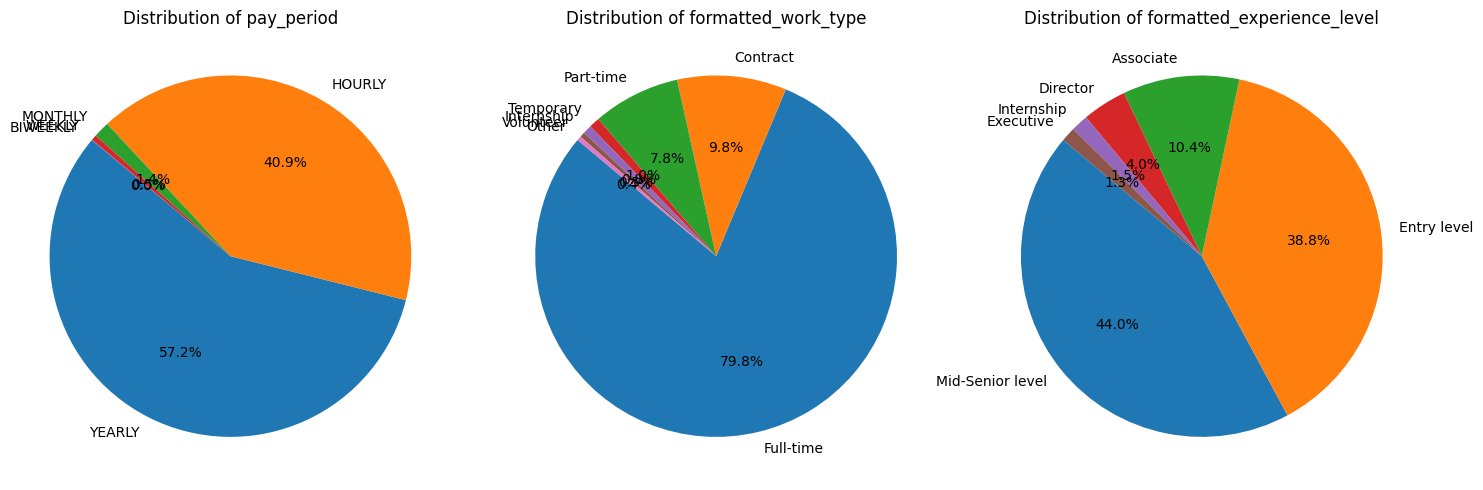

Descriptive statistics for pay_period: BIWEEKLY


,min_salary,med_salary,max_salary,normalized_salary
count,9.000000,0.0,9.000000,9.000000e+00
mean,42492.333333,NaN,53558.555556,1.248662e+06
std,30822.868722,NaN,39083.334550,9.086961e+05
min,2057.000000,NaN,2057.000000,5.348200e+04
25%,2245.000000,NaN,3366.000000,7.294300e+04
50%,54009.000000,NaN,66976.000000,1.572805e+06
75%,64519.000000,NaN,81459.000000,1.897389e+06
max,71323.000000,NaN,89965.000000,2.096744e+06


Descriptive statistics for pay_period: HOURLY


,min_salary,med_salary,max_salary,normalized_salary
count,10202.000000,4522.000000,10202.000000,1.472400e+04
mean,196.127876,27.430179,238.817459,3.309431e+05
std,4193.238617,19.387829,4973.925177,7.932220e+06
min,7.000000,9.000000,7.000000,1.456000e+04
25%,18.370000,17.700000,23.100000,4.070560e+04
50%,25.000000,21.000000,32.000000,5.252000e+04
75%,40.000000,29.257500,52.000000,8.632000e+04
max,240000.000000,600.000000,275000.000000,5.356000e+08


Descriptive statistics for pay_period: MONTHLY


,min_salary,med_salary,max_salary,normalized_salary
count,288.000000,230.000000,288.000000,5.180000e+02
mean,5910.184514,2957.162304,8576.551285,6.408272e+04
std,6403.930506,2227.949123,8924.781189,7.419040e+04
min,1.000000,50.000000,40.000000,4.200000e+02
25%,3701.690000,2111.250000,5406.152500,2.834700e+04
50%,5550.000000,2364.500000,7350.000000,5.363400e+04
75%,6760.000000,2964.250000,9932.000000,8.210910e+04
max,90000.000000,25000.000000,110000.000000,1.200000e+06


Descriptive statistics for pay_period: WEEKLY


,min_salary,med_salary,max_salary,normalized_salary
count,176.000000,0.0,176.000000,176.000000
mean,2145.027727,NaN,2149.198068,111649.870682
std,411.495990,NaN,412.211843,21409.588030
min,977.000000,NaN,977.000000,50804.000000
25%,1917.000000,NaN,1932.250000,100308.000000
50%,2099.000000,NaN,2099.000000,109148.000000
75%,2301.590000,NaN,2301.590000,119682.680000
max,4049.000000,NaN,4049.000000,210548.000000


Descriptive statistics for pay_period: YEARLY


,min_salary,med_salary,max_salary,normalized_salary
count,1.909600e+04,1520.000000,1.909600e+04,2.061600e+04
mean,1.009796e+05,90395.248500,1.430593e+05,1.196878e+05
std,6.165621e+05,71490.364377,8.715562e+05,7.161028e+05
min,1.000000e+00,0.000000,1.000000e+00,0.000000e+00
25%,6.500000e+04,52000.000000,8.500000e+04,7.250000e+04
50%,8.700000e+04,71947.500000,1.200000e+05,1.020000e+05
75%,1.200000e+05,110000.000000,1.700000e+05,1.425000e+05
max,8.500000e+07,750000.000000,1.200000e+08,1.025000e+08


In [19]:
df.shape
# List of salary-related columns
salary_columns = [
    'min_salary', 'med_salary', 'max_salary',
    'normalized_salary', 'pay_period', 'formatted_work_type',
    'formatted_experience_level'
]

# Display basic information about the salary columns
display(df[salary_columns].describe()) #not too good
display(df[salary_columns].isnull().sum())

df['pay_period'].value_counts()
#Pie charts for pay_period, formatted_work_type, formatted_experience_level

columns_to_plot = ['pay_period', 'formatted_work_type', 'formatted_experience_level']

# Set up the figure size based on the number of charts
plt.figure(figsize=(15, 5))

# Loop over each column to create a pie chart
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    # Calculate the counts for each category
    data = df[column].value_counts()
    # Plot the pie chart
    plt.pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#Remove outliers in 'normalized_salary'


for pay_period, group in df.groupby('pay_period'):
    print(f"Descriptive statistics for pay_period: {pay_period}")
    display(group[salary_columns].describe())


### **3.4 Handling Time Data**

Convert time-related columns from milliseconds to datetime format.

In [20]:
print(df.shape[0])
# List of time-related columns
time_columns = ['original_listed_time', 'listed_time', 'expiry', 'listed_time', 'closed_time']
display(df[time_columns].describe())
df[time_columns].isnull().sum()


123547


,original_listed_time,listed_time,expiry,listed_time,closed_time
count,1.235470e+05,1.235470e+05,1.235470e+05,1.235470e+05,1.073000e+03
mean,1.713152e+12,1.713204e+12,1.716214e+12,1.713204e+12,1.712928e+12
std,4.850112e+08,3.989422e+08,2.324068e+09,3.989422e+08,3.622893e+08
min,1.701811e+12,1.711317e+12,1.712903e+12,1.711317e+12,1.712346e+12
25%,1.712863e+12,1.712885e+12,1.715481e+12,1.712885e+12,1.712670e+12
50%,1.713395e+12,1.713407e+12,1.716042e+12,1.713407e+12,1.712670e+12
75%,1.713478e+12,1.713483e+12,1.716088e+12,1.713483e+12,1.713283e+12
max,1.713573e+12,1.713573e+12,1.729125e+12,1.713573e+12,1.713562e+12


,0
original_listed_time,0
listed_time,0
expiry,0
listed_time,0
closed_time,122474


In [21]:
# Convert time columns from milliseconds to datetime
for col in time_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], unit='ms')

# Drop 'closed_time' if it exists, most closed_time columns are null
if 'closed_time' in df.columns:
    df.drop(columns=['closed_time'], inplace=True)

In [22]:
# Filter for recent job postings from April 15, 2024 onwards
if 'original_listed_time' in df.columns:
    df = df[df['original_listed_time'] >= '2024-04-15']
    print(f"Dataset after filtering recent posts: {df.shape[0]} rows.")

Dataset after filtering recent posts: 84548 rows.


## **4. Exploratory Data Analysis (EDA)**

We perform EDA to uncover insights from the data.

### **4.1 Job Postings by State**

We visualize the number of job postings by state using a choropleth map.

In [23]:
# Install plotly (if not already installed)
try:
    import plotly.express as px
except ImportError:
    !pip install plotly
    import plotly.express as px

In [24]:
# Aggregate job postings by state
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'job_postings']

# Sort states by job postings in descending order
state_counts = state_counts.sort_values(by='job_postings', ascending=False)
print(state_counts)
# Filter states with more than 100 job postings


#Convert to 2 letter abbreviation
state_name_to_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}
state_counts['state'] = state_counts['state'].map(state_name_to_abbr)
# Create a choropleth map

state_counts_log = state_counts.copy()
state_counts_log['job_postings'] = np.log1p(state_counts_log['job_postings'] + 1)

fig = px.choropleth(
    state_counts_log,
    locations='state',
    locationmode='USA-states',
    color='job_postings',
    hover_name='state',
    color_continuous_scale='RdYlGn',
    scope='usa',
    labels={'job_postings': 'Job scarcity score'}
)

fig.update_layout(
    title_text='Number of Job Postings by State (US)',
    geo=dict(
        projection_type='albers usa'
    )
)

fig.update_layout(coloraxis_showscale=True)

fig.show()

                   state  job_postings
0                  Texas          7102
1             California          7082
2               New York          4098
3                Florida          3981
4               Illinois          2993
5           Pennsylvania          2821
6         North Carolina          2618
7               Virginia          2477
8                Georgia          2430
9          Massachusetts          2383
10            New Jersey          2295
11                  Ohio          2206
12              Michigan          1979
13            Washington          1647
14               Arizona          1636
15              Colorado          1486
16              Maryland          1325
17              Missouri          1314
18             Wisconsin          1228
19               Indiana          1211
20             Tennessee          1205
21             Minnesota          1198
22        South Carolina          1000
23           Connecticut           836
24              Kentucky 

### **4.2 Listings by Hour of the Day**

Analyze when job postings are listed during the day.

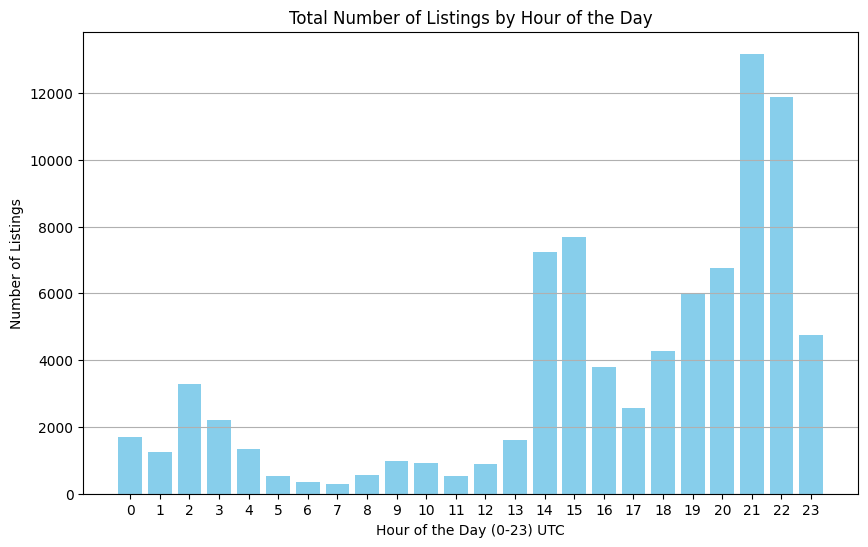

In [25]:
# Extract hour from 'listed_time'
if 'listed_time' in df.columns:
    df['hour'] = df['listed_time'].dt.hour

    # Group by hour
    listings_per_hour = df['hour'].value_counts().sort_index()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(listings_per_hour.index, listings_per_hour.values, color='skyblue')
    plt.title('Total Number of Listings by Hour of the Day')
    plt.xlabel('Hour of the Day (0-23) UTC')
    plt.ylabel('Number of Listings')
    plt.xticks(range(0, 24))
    plt.grid(axis='y')
    plt.show()

    # Drop the 'hour' column after analysis
    df.drop(columns=['hour'], inplace=True)

    #Assuming that the time zone is UTC 00:00 Most job postings were made in working hours from 9 to 5

### **4.3 Views Distribution**

We examine the distribution of the number of views per job posting.

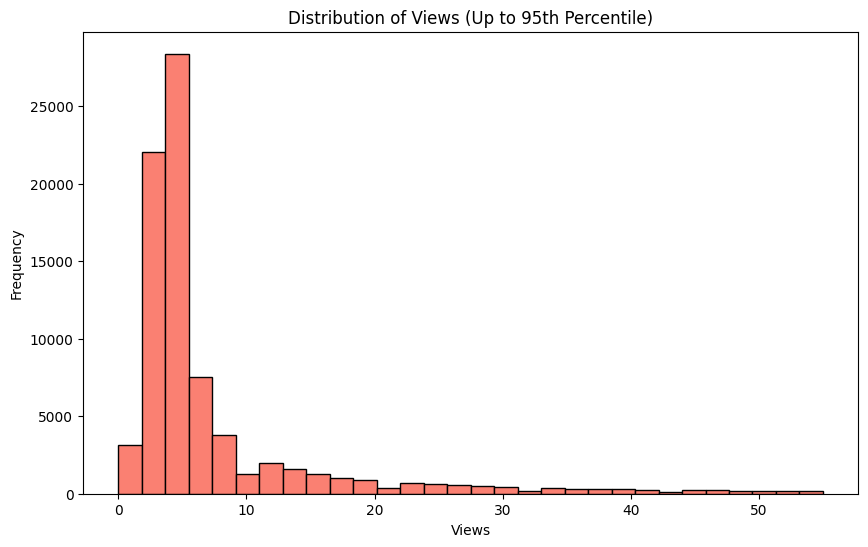

Percentage of postings with 20 or fewer views: 86.19%


In [26]:
if 'views' in df.columns:
    # Calculate the 95th percentile for views
    max_views = df['views'].quantile(0.95)

    # Plot histogram of views
    plt.figure(figsize=(10, 6))
    plt.hist(df['views'], bins=30, range=(0, max_views), edgecolor='black', color='salmon')
    plt.title('Distribution of Views (Up to 95th Percentile)')
    plt.xlabel('Views')
    plt.ylabel('Frequency')
    plt.show()

    # Calculate and print percentage of postings with 20 or fewer views
    percentage_below_20 = (df['views'] <= 20).mean() * 100
    print(f"Percentage of postings with 20 or fewer views: {percentage_below_20:.2f}%")

### **4.4 Salary Distribution**

We analyze the distribution of normalized salaries.

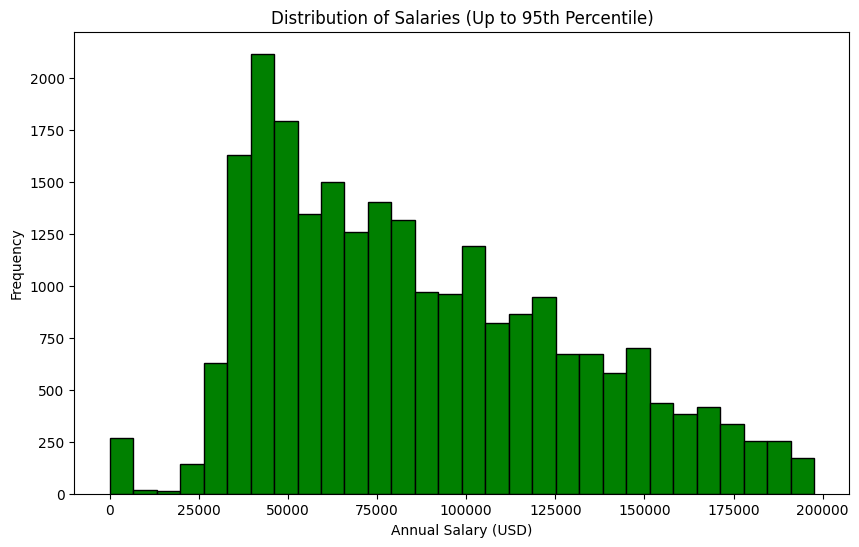

In [27]:
if 'normalized_salary' in df.columns:
    # Extract non-null salaries
    salaries = df['normalized_salary'].dropna()

    # Calculate the 95th percentile
    salary_95th = salaries.quantile(0.95)

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(salaries, bins=30, range=(0, salary_95th), edgecolor='black', color='green')
    plt.title('Distribution of Salaries (Up to 95th Percentile)')
    plt.xlabel('Annual Salary (USD)')
    plt.ylabel('Frequency')
    plt.show()

## **5. Text Analysis and NLP**

We perform text analysis on job titles to identify data analyst roles.

#### 5.1 Use Cosine similarity and word embeddings to extract job positions related to the data field

In [ ]:
!pip install sentence-transformers

In [27]:
#Use cosine similarity and embeddings to compute scores for all jobs that might be data analyst related

from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np



# Ensure the 'description' column is of string type and handle NaNs
df['description'] = df['description'].fillna('').astype(str)

# Convert descriptions to a list
descriptions = df['description'].tolist()

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings for the descriptions
description_embeddings = model.encode(descriptions, convert_to_tensor=True)

# Compute embedding for 'data analyst'
target_phrase = "data analyst"
target_embedding = model.encode(target_phrase, convert_to_tensor=True)

# Compute cosine similarities
cosine_scores = util.cos_sim(description_embeddings, target_embedding)

# Convert the cosine scores tensor to a numpy array
similarity_scores = cosine_scores.cpu().numpy().flatten()

# Add the similarity scores to the DataFrame
df['similarity_to_data_analyst'] = similarity_scores

# Sort the DataFrame by similarity scores in descending order
df_sorted = df.sort_values(by='similarity_to_data_analyst', ascending=False)

# Display the top 10 most similar descriptions

In [27]:
dff = df_sorted[:3000].copy()
#display top 10
display(df_sorted[['title', 'description', 'similarity_to_data_analyst']].head(10))

dff.shape
dff = dff.reset_index(drop=True)
print(dff.loc[2900:3000, 'title'])

### **5.2 Filtering for Data Analyst Roles**

We identify job postings that are likely data analyst roles based on cosine similarity.
We could also look for the once that have "Data Analyst in their

### **5.2 Find job tiles related to Data Analysis Using text

We use a pre-trained language model to generate embeddings for job titles.

In [29]:
df.shape

(84548, 27)

In [30]:
import pandas as pd
import re

# List of data analyst job titles
data_analyst_titles = [
    'Data Analyst', 'Junior Data Analyst', 'Senior Data Analyst',
    'Data Analyst I', 'Data Analyst II', 'Data Analyst III',
    'Business Data Analyst', 'Marketing Data Analyst', 'Financial Data Analyst',
    'Data Analytics Specialist', 'Data Reporting Analyst', 'SQL Data Analyst',
    'Data Scientist', 'Data Engineer', 'BI Analyst', 'Business Intelligence Analyst'
]

# Ensure that your 'title' column is of string type
df['title'] = df['title'].astype(str)

# Escape special characters in job titles to avoid regex issues
escaped_titles = [re.escape(title) for title in data_analyst_titles]

# Create a regex pattern by joining the escaped titles with '|'
pattern = '|'.join(escaped_titles)

# Filter the DataFrame using str.contains()
filtered_df = df[df['title'].str.contains(pattern, case=False, na=False)]

# Display the filtered DataFrame
print(filtered_df.shape[0])

#I looked at the disjoint parts and looks like filtered_df is better)

764


### Looks like my word embedding idea didn't work too well. But let's now analyze data related rows

In [31]:
data_related_positions = filtered_df.copy()
data_related_positions.reset_index(drop=True, inplace=True)

### 5.3 Clean the data for NLP


In [32]:
data_related_positions.shape
data_related_positions.isnull().sum()

,0
job_id,0
company_name,5
title,0
description,0
max_salary,522
pay_period,510
company_id,5
views,9
med_salary,752
min_salary,522


In [33]:
print(data_related_positions.shape)
data_related_positions.isnull().sum()
data_related_positions.head()

(764, 27)


,job_id,company_name,title,description,max_salary,pay_period,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,application_type,expiry,formatted_experience_level,skills_desc,listed_time,work_type,currency,compensation_type,normalized_salary,zip_code,city,state,country
0,3742692445,ZenithMinds Inc,Sr Data Engineer with Kafka,Data Engineer with Kafka (W2 Only)💯% Remote\nM...,NaN,NaN,81941852.0,39.0,NaN,NaN,Full-time,10.0,2024-04-15 19:17:53,1.0,ComplexOnsiteApply,2024-10-12 19:17:15,NaN,NaN,2024-04-15 19:17:53,FULL_TIME,NaN,NaN,NaN,78701,Austin,Texas,US
1,3797449314,"Subaru Research and Development, Inc",Cloud Platform/ Big Data Engineer,About Subaru Research and Development:Do you c...,NaN,NaN,91080439.0,7.0,NaN,NaN,Full-time,1.0,2024-04-19 18:57:34,NaN,ComplexOnsiteApply,2024-05-19 18:57:34,Entry level,NaN,2024-04-19 18:57:34,FULL_TIME,NaN,NaN,NaN,0,None,None,US
2,3800989742,SilverSpace Technologies Inc,Data Engineer/ETL,"Responsibilities:Develop new features, fix bug...",NaN,NaN,71373471.0,39.0,NaN,NaN,Contract,12.0,2024-04-19 13:36:53,NaN,ComplexOnsiteApply,2024-05-19 13:36:53,NaN,NaN,2024-04-19 13:36:53,CONTRACT,NaN,NaN,NaN,06101,Hartford,Connecticut,US
3,3813645405,Tenazx Inc,Data Analyst,Job Title: Data AnalystDuration: ContractLocat...,NaN,NaN,82537206.0,4.0,NaN,NaN,Contract,NaN,2024-04-18 18:34:39,NaN,ComplexOnsiteApply,2024-05-18 18:34:39,NaN,NaN,2024-04-18 18:34:39,CONTRACT,NaN,NaN,NaN,11427,Queens Village,New York,US
4,3872787865,Radiant Systems Inc,eCommerce Data Analyst,Job Description: JOB SUMMARY:Responsible for c...,NaN,NaN,3342169.0,102.0,NaN,NaN,Contract,NaN,2024-04-16 14:27:04,1.0,ComplexOnsiteApply,2024-05-16 14:27:04,NaN,NaN,2024-04-16 14:27:04,CONTRACT,NaN,NaN,NaN,0,None,None,US


In [34]:
ddf = data_related_positions.copy()

In [35]:
#Turn string to lower case
ddf['description'] = ddf["description"].str.lower()


#Remove punctuation
import re
s = "string. With. Punctuation?"
ddf['description'] = ddf['description'].apply(lambda x: re.sub(r'[^\w\s]', ' ', str(x)))

#Remove /n
ddf['description'] = ddf['description'].apply(lambda x: re.sub(r'\n', ' ', str(x)))

#Remove numbers
ddf['description'] = ddf['description'].apply(lambda x: re.sub(r'\d+', '', str(x)))




print(ddf['description'])

0      data engineer with kafka  w only    remote min...
1      about subaru research and development do you c...
2      responsibilities develop new features  fix bug...
3      job title  data analystduration  contractlocat...
4      job description  job summary responsible for c...
                             ...                        
759    position title  data scientist ii  pay rate   ...
760    as the world s largest car sharing marketplace...
761    about this featured opportunity  we are lookin...
762    role title  data engineering lead for a global...
763    overview  the credit risk   decision science t...
Name: description, Length: 764, dtype: object


In [36]:
#Create tokens
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
ddf['description'] = ddf['description'].apply(lambda x: word_tokenize(str(x)))


print(ddf['description'])


#Remove Stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ddf['description'] = ddf['description'].apply(lambda x: [word for word in x if word not in stop_words])

print(ddf['description'])

#Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
ddf['description'] = ddf['description'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

print(ddf['description'])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0      [data, engineer, with, kafka, w, only, remote,...
1      [about, subaru, research, and, development, do...
2      [responsibilities, develop, new, features, fix...
3      [job, title, data, analystduration, contractlo...
4      [job, description, job, summary, responsible, ...
                             ...                        
759    [position, title, data, scientist, ii, pay, ra...
760    [as, the, world, s, largest, car, sharing, mar...
761    [about, this, featured, opportunity, we, are, ...
762    [role, title, data, engineering, lead, for, a,...
763    [overview, the, credit, risk, decision, scienc...
Name: description, Length: 764, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0      [data, engineer, kafka, w, remote, min, strong...
1      [subaru, research, development, care, making, ...
2      [responsibilities, develop, new, features, fix...
3      [job, title, data, analystduration, contractlo...
4      [job, description, job, summary, responsible, ...
                             ...                        
759    [position, title, data, scientist, ii, pay, ra...
760    [world, largest, car, sharing, marketplace, tu...
761    [featured, opportunity, looking, data, enginee...
762    [role, title, data, engineering, lead, global,...
763    [overview, credit, risk, decision, science, te...
Name: description, Length: 764, dtype: object


[nltk_data] Downloading package wordnet to /root/nltk_data...


0      [data, engineer, kafka, w, remote, min, strong...
1      [subaru, research, development, care, making, ...
2      [responsibility, develop, new, feature, fix, b...
3      [job, title, data, analystduration, contractlo...
4      [job, description, job, summary, responsible, ...
                             ...                        
759    [position, title, data, scientist, ii, pay, ra...
760    [world, largest, car, sharing, marketplace, tu...
761    [featured, opportunity, looking, data, enginee...
762    [role, title, data, engineering, lead, global,...
763    [overview, credit, risk, decision, science, te...
Name: description, Length: 764, dtype: object


In [37]:
ddf.to_csv('/content/drive/MyDrive/Data/data_related_positions_cleaned.csv', index=False)

In [38]:
ddf = pd.read_csv('/content/drive/MyDrive/Data/data_related_positions_cleaned.csv')
print(ddf["description"])

0      ['data', 'engineer', 'kafka', 'w', 'remote', '...
1      ['subaru', 'research', 'development', 'care', ...
2      ['responsibility', 'develop', 'new', 'feature'...
3      ['job', 'title', 'data', 'analystduration', 'c...
4      ['job', 'description', 'job', 'summary', 'resp...
                             ...                        
759    ['position', 'title', 'data', 'scientist', 'ii...
760    ['world', 'largest', 'car', 'sharing', 'market...
761    ['featured', 'opportunity', 'looking', 'data',...
762    ['role', 'title', 'data', 'engineering', 'lead...
763    ['overview', 'credit', 'risk', 'decision', 'sc...
Name: description, Length: 764, dtype: object


#### 5.3 Extract keywords from each description

In [39]:
ddf["description"].isnull().sum()
print(ddf['description'])

0      ['data', 'engineer', 'kafka', 'w', 'remote', '...
1      ['subaru', 'research', 'development', 'care', ...
2      ['responsibility', 'develop', 'new', 'feature'...
3      ['job', 'title', 'data', 'analystduration', 'c...
4      ['job', 'description', 'job', 'summary', 'resp...
                             ...                        
759    ['position', 'title', 'data', 'scientist', 'ii...
760    ['world', 'largest', 'car', 'sharing', 'market...
761    ['featured', 'opportunity', 'looking', 'data',...
762    ['role', 'title', 'data', 'engineering', 'lead...
763    ['overview', 'credit', 'risk', 'decision', 'sc...
Name: description, Length: 764, dtype: object


In [40]:
#Get keywords using tidf
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample list of tokenized documents


# Join tokenized documents into strings
document = ddf['description'].astype(str)
print(document)

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(document)

# Extract keywords with their TF-IDF scores
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
sorted_keywords = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# Display top 5 keywords
top_keywords_tfidf = sorted_keywords[:60]
print(top_keywords_tfidf)

0      ['data', 'engineer', 'kafka', 'w', 'remote', '...
1      ['subaru', 'research', 'development', 'care', ...
2      ['responsibility', 'develop', 'new', 'feature'...
3      ['job', 'title', 'data', 'analystduration', 'c...
4      ['job', 'description', 'job', 'summary', 'resp...
                             ...                        
759    ['position', 'title', 'data', 'scientist', 'ii...
760    ['world', 'largest', 'car', 'sharing', 'market...
761    ['featured', 'opportunity', 'looking', 'data',...
762    ['role', 'title', 'data', 'engineering', 'lead...
763    ['overview', 'credit', 'risk', 'decision', 'sc...
Name: description, Length: 764, dtype: object
[('data', 114.60256076335374), ('experience', 46.565460285914824), ('work', 31.155718206287187), ('business', 30.863158393739194), ('team', 29.455872060014382), ('skill', 23.344707543006454), ('ai', 22.125090928134465), ('year', 20.27650695851269), ('solution', 20.242476867599446), ('analysis', 20.168822325849654), ('quality'

In [41]:
!pip install rake-nltk

In [42]:
#Get keywords using Rake

import nltk
from rake_nltk import Rake

rake = Rake()
# Initialize a dictionary to store keyword scores
keyword_scores = {}

for doc in document:
    # Extract keywords from the document
    rake.extract_keywords_from_text(doc)
    # Get the keyword phrases ranked highest to lowest with their scores
    ranked_phrases_with_scores = rake.get_ranked_phrases_with_scores()

    for score, phrase in ranked_phrases_with_scores:
        # Aggregate scores for each keyword phrase
        if phrase in keyword_scores:
            keyword_scores[phrase] += score
        else:
            keyword_scores[phrase] = score

# Sort the keywords by their aggregated scores in descending order
sorted_keywords = sorted(keyword_scores.items(), key=lambda x: x[1], reverse=True)

# Display top 60 keywords
top_keywords_rake = sorted_keywords[:60]
print(top_keywords_rake)


[("data ',", 35314.1771583875), ("experience ',", 13026.332420036591), ("team ',", 8265.65433249374), ("work ',", 8125.420186528112), ("business ',", 7546.883936619386), ("skill ',", 5411.997577385463), ("year ',", 5024.127205082481), ("solution ',", 4530.951091694065), ("including ',", 4010.137918845786), ("opportunity ',", 3977.856277119173), ("analysis ',", 3957.983530564871), ("technology ',", 3930.17805727631), ("role ',", 3886.027810645391), ("support ',", 3749.906645464985), ("development ',", 3739.008613054306), ("analytics ',", 3642.387827196165), ("science ',", 3581.964757013263), ("ability ',", 3469.8583301893923), ("sql ',", 3463.367097975266), ("tool ',", 3454.3083614816346), ("information ',", 3313.53321730354), ("time ',", 3309.9240288139513), ("process ',", 3309.793717281431), ("service ',", 3261.822219101358), ("technical ',", 3222.0303795844), ("product ',", 3218.4730224838177), ("management ',", 3173.919922734583), ("project ',", 3170.217839006496), ("position ',", 3

## **6. Conclusions and Recommendations**

**Key Findings:**

- **Geographical Distribution:** The majority of job postings are concentrated in certain states. This information can guide job seekers on where to focus their search.
- **Timing of Postings:** Most job postings occur during typical business hours, suggesting optimal times for job searching.
- **Views and Salaries:** There is a wide distribution in the number of views and salary offerings, indicating variability in job popularity and compensation.
- **Data Analyst Roles Identification:** Using NLP techniques, we successfully identified data analyst roles beyond those explicitly titled as such. We were able to find 4 times as many data positions using NLP instead of brute force.
- **Key word analysis** Using NLP Rake technique, we succesfully identified data science related positions key most used skills.
<br></br>
Among those were: SQL, python, AWS infrastructure (cloud based computing), BI tools for dashboards such as Tableu.<br></br>
Among the soft skills were: team-work, communication, life-time learning was something I didn't initially realise would be on the list.

**Recommendations:**

- **For Aspiring Data Analysts:**
  - Focus on states with higher job postings.
  - Optimize application timing based on when most listings are posted. If you want to be first you can apply in work hours. And if you want the time where majority of job postings were posted for the day and you want to apply to all of them. You should apply around 6pm UTC.
  - Tailor resumes to align with keywords found in data analyst job descriptions.

- **For Further Analysis:**
  - Improve the keyword alogrithm, perhaps creating an array of strings of technical knowledge and then seeign if the keyword is in the list. Then saving the scores.
  - Analyze salary trends concerning experience levels.
  - Investigate company-specific hiring patterns.
  - Investigate industry specifics. (Healthcare, entertainment, sales, retail, e-commers so on...)